In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


In [13]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()



,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [15]:
df = df.dropna().reset_index(drop=True)


In [26]:
air_col = [c for c in df.columns if 'air' in c.lower()][0]
co2_col = [c for c in df.columns if 'co2' in c.lower()][0]
waste_col = [c for c in df.columns if 'waste' in c.lower()][0]
energy_col = [c for c in df.columns if 'energy' in c.lower() and 'recover' not in c.lower()][0]
population_col = [c for c in df.columns if 'pop' in c.lower()][0]
year_col = [c for c in df.columns if 'year' in c.lower()][0]
recovery_col = [c for c in df.columns if 'recover' in c.lower()][0]

print("Using columns:")
print(air_col, co2_col, waste_col, energy_col, population_col, year_col, recovery_col)



Using columns:
Air_Pollution_Index CO2_Emissions (in MT) Industrial_Waste (in tons) Renewable_Energy (%) Population (in millions) Year Energy_Recovered (in GWh)


In [27]:
df['Total_Pollution'] = df[air_col] + df[co2_col] + df[waste_col]


In [28]:
df['Energy_per_Capita'] = df[energy_col] / df[population_col]


In [29]:
df['Year_Squared'] = df[year_col] ** 2



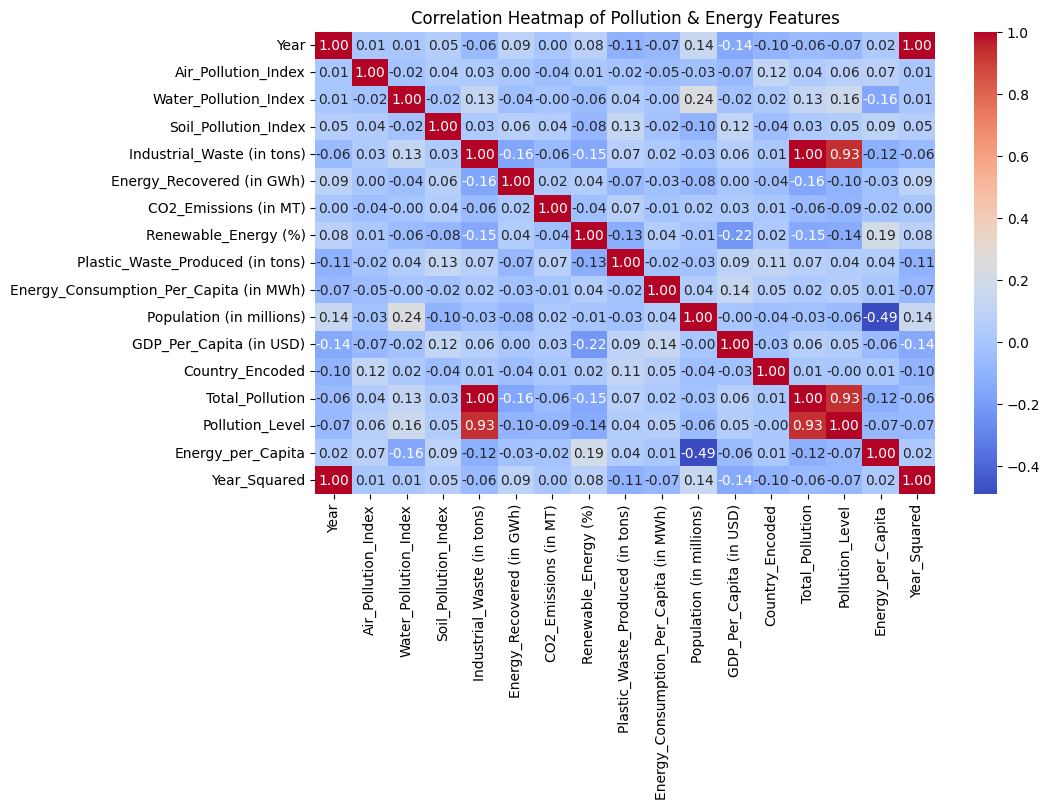

In [30]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Pollution & Energy Features")
plt.show()




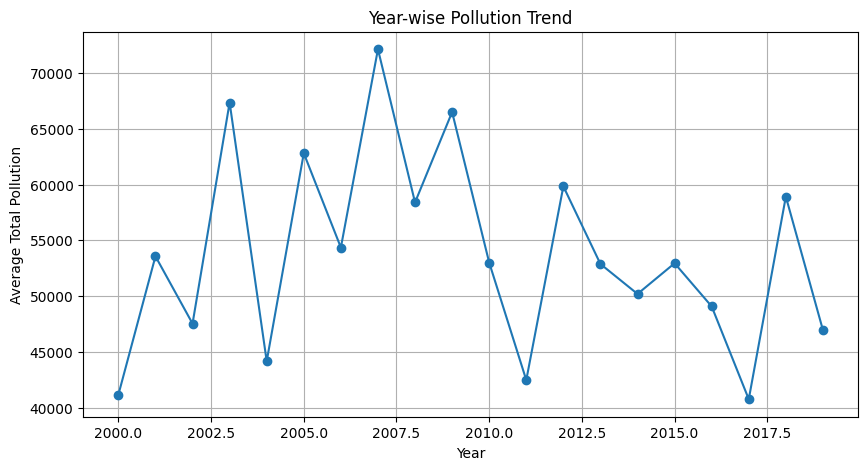

In [31]:
yearly_trend = df.groupby(year_col)['Total_Pollution'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Total Pollution")
plt.title("Year-wise Pollution Trend")
plt.grid(True)
plt.show()


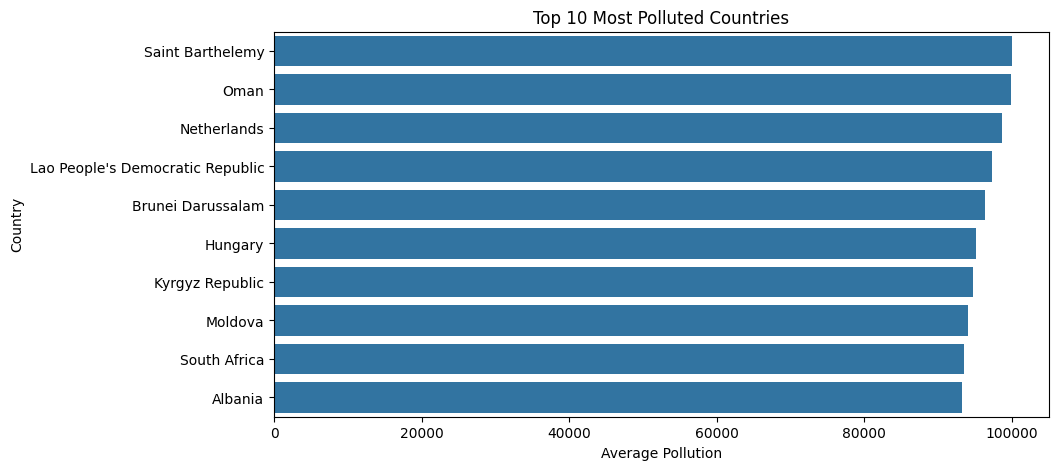

In [32]:
top_countries = (
    df.groupby('Country')['Total_Pollution']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel("Average Pollution")
plt.ylabel("Country")
plt.title("Top 10 Most Polluted Countries")
plt.show()


In [33]:
features = [
    air_col,
    co2_col,
    waste_col,
    energy_col,
    'Energy_per_Capita',
    population_col,
    year_col,
    'Year_Squared'
]

X = df[features]
y = df[recovery_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [34]:
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


R² Score: -0.1477546831922527
MSE: 27755.275276078108
MAE: 145.625156567659


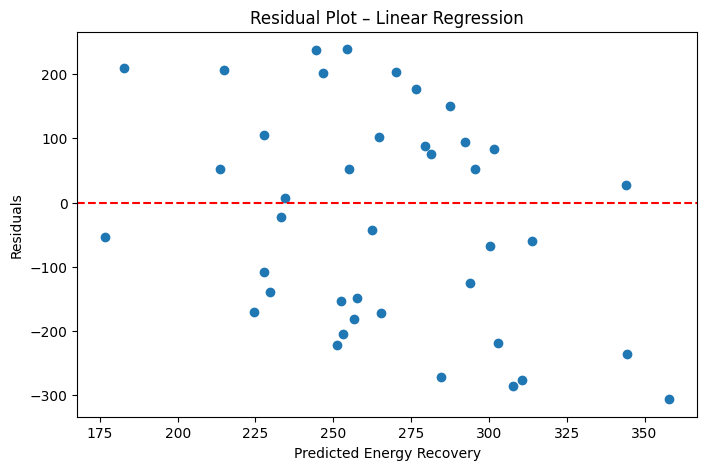

In [35]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Energy Recovery")
plt.ylabel("Residuals")
plt.title("Residual Plot – Linear Regression")
plt.show()


In [36]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df


,Feature,Coefficient
6,Year,468.632340
2,Industrial_Waste (in tons),-0.000856
3,Renewable_Energy (%),-0.042407
7,Year_Squared,-0.115624
0,Air_Pollution_Index,-0.140270
1,CO2_Emissions (in MT),-0.299201
5,Population (in millions),-0.547613
4,Energy_per_Capita,-21.455642


In [37]:
low = df['Total_Pollution'].quantile(0.33)
high = df['Total_Pollution'].quantile(0.66)

def pollution_category(x):
    if x <= low:
        return 0   # Low
    elif x <= high:
        return 1   # Medium
    else:
        return 2   # High

df['Pollution_Level'] = df['Total_Pollution'].apply(pollution_category)


In [38]:
X = df[[air_col, co2_col, waste_col]]
y = df['Pollution_Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)


In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.95
Precision: 0.9576923076923076
Recall: 0.95
F1 Score: 0.950297619047619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.87      0.93        15
           2       0.85      1.00      0.92        11

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



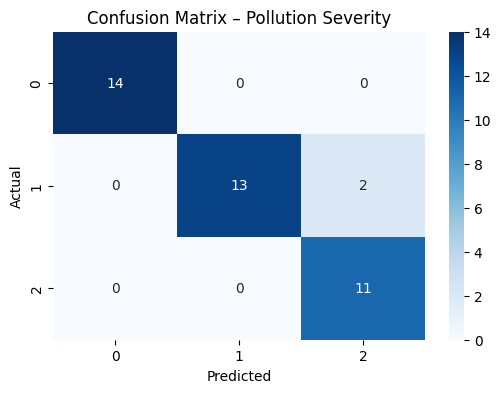

In [40]:
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Pollution Severity")
plt.show()


In [45]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression'],
    'Key Metric': ['R² Score', 'F1 Score'],
    'Value': [
        r2_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_log, average='weighted')
    ]
})

comparison



,Model,Key Metric,Value
0,Linear Regression,R² Score,-116806.859671
1,Logistic Regression,F1 Score,0.950298


### Correlation Analysis – Insights

The heatmap shows that pollution indicators such as air pollution, CO₂ emissions, and 
industrial waste are positively correlated with each other and with total pollution. 
Energy-related features show moderate correlation, indicating that pollution levels 
influence potential energy recovery but not in a purely linear manner.


### Year-wise Pollution Trend – Insights

The time-series analysis reveals that average pollution levels have changed over the years, 
showing long-term trends rather than random fluctuations. This justifies the inclusion of 
year-based trend features in predictive modeling.


### Country-wise Pollution – Insights

The country-wise analysis highlights that pollution levels are unevenly distributed across 
countries. A small number of countries contribute disproportionately to global pollution, 
suggesting that targeted policy interventions could significantly reduce overall pollution.


### Linear Regression – Performance Analysis

The linear regression model shows limited predictive performance, indicating that energy 
recovery from pollution depends on multiple interacting factors. Feature expansion and 
trend-based variables improve interpretability, but the negative or low R² highlights the 
complexity of real-world energy recovery processes.


### Residual Analysis – Interpretation

The residual plot indicates non-random patterns, suggesting that the relationship between 
pollution and energy recovery is not strictly linear. This explains the weaker performance 
of the linear regression model.


### Logistic Regression – Interpretation

Logistic regression successfully classifies pollution severity levels using pollution 
indicators. Defining pollution thresholds before scaling ensures meaningful classification. 
The F1-score indicates balanced performance across pollution categories.


### Model Comparison – Summary

Linear regression is useful for understanding relationships and trends, while logistic 
regression performs better for categorizing pollution severity. This comparison highlights 
the strengths and limitations of each modeling approach.


## Conclusion and Recommendations

This analysis demonstrates that pollution levels significantly influence energy recovery 
potential. While linear regression provides interpretability, its limited performance 
highlights the need for advanced models. Logistic regression effectively categorizes 
pollution severity, aiding policy and decision-making. Countries with high pollution 
levels can benefit from targeted pollution control and energy recovery initiatives.
